<a href="https://colab.research.google.com/github/Dhruvi-1234/Cars_price_project/blob/main/cars_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
import pandas as pd

In [157]:
import seaborn as sns

In [158]:
cars_price = pd.read_csv('cars_price.csv')

In [159]:
cars_price.shape

(205, 26)

In [160]:
cars_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [161]:
cars_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [162]:
cars_price.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [163]:
# While inspecting, it appears that the dataset has missing values and those are indicated with '?' mark.
# The dataset is not showing any null values because all the missing value is filled with '?' 

Cleaning and Transforming the Data

In [164]:
cars_price['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [165]:
# the column *'normalized-losses'* represents the average loss payment per insured vehicle.
# So, it is unlikely to be a strong predictor of the price of the vehicle.
# So we can drop this whole column from our dataset.

In [166]:
cars_price.drop('normalized-losses',axis = 1,inplace = True)

In [167]:
cars_price.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [168]:
cars_price['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [169]:
cars_price['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [170]:
cars_price['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [171]:
cars_price['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [172]:
cars_price['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [173]:
cars_price['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [174]:
import numpy as np

In [175]:
# Repalcing '?'
cars_price.replace('?',np.nan,inplace = True) 

In [176]:
cars_price['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [177]:
cars_price.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [178]:
# It appears that the new dataframe consists maximum 18 missing values in various columns. Since it is very small number, these observation can be deleted without having any impact on the data.

## Droppping NaN values

cars_price.dropna(axis = 0,how = 'any', inplace = True)

In [179]:
correlation = cars_price.corr()
correlation

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.175160,0.017639,0.085775
wheel-base,-0.536516,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.252234,-0.504499,-0.571771
length,-0.363194,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.156061,-0.702143,-0.731264
width,-0.247741,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.188631,-0.657153,-0.702009
height,-0.517803,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.253934,-0.111166,-0.159850
curb-weight,-0.231086,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.161030,-0.777763,-0.818104
engine-size,-0.068327,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.025257,-0.716378,-0.737531
compression-ratio,-0.175160,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,1.000000,0.314648,0.249669
city-mpg,0.017639,-0.504499,-0.702143,-0.657153,-0.111166,-0.777763,-0.716378,0.314648,1.000000,0.971975
highway-mpg,0.085775,-0.571771,-0.731264,-0.702009,-0.159850,-0.818104,-0.737531,0.249669,0.971975,1.000000


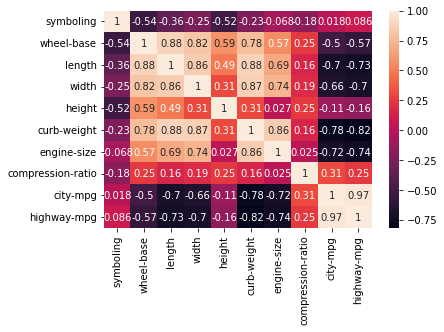

In [180]:
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns,annot=True )

In [181]:
cars_price.isnull().sum() # no missing values are present

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [182]:
cars_price.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [183]:
# Converting the Datatypes of variables
cars_price[['stroke','bore']] = cars_price[['stroke','bore']].astype(float)
cars_price[['price','peak-rpm','horsepower']] = cars_price[['price','peak-rpm','horsepower']].astype(int)

In [184]:
cars_price.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [185]:
import matplotlib.pyplot as plt

In [186]:
import seaborn as sns

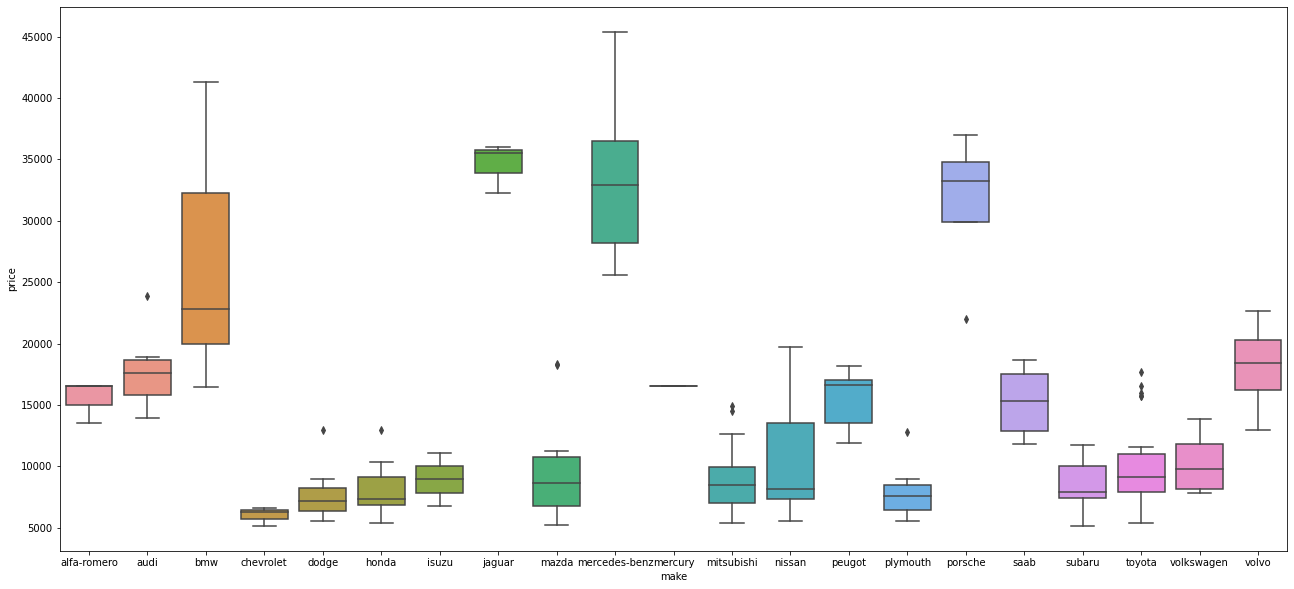

In [187]:
plt.figure(figsize = (22,10))
sns.boxplot(x = 'make', y = 'price', data = cars_price)

In [188]:
# 1.From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Jaguar,Mercedes-Benz and porsche.
# 2.Whereas the lower priced cars belong to chevrolet

In [189]:
cars_price.make.value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [190]:
cars_price['num-of-doors'].value_counts()
# As there are numbers, let us convert these numbers into numeric form.

four    112
two      81
Name: num-of-doors, dtype: int64

In [191]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_price['num-of-doors'] = cars_price[['num-of-doors']].apply(number_)

In [192]:
cars_price['num-of-doors'].value_counts() # Rechecking

4    112
2     81
Name: num-of-doors, dtype: int64

In [193]:
cars_price['num-of-cylinders'].value_counts()

four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [194]:
def convert_number(x):
    return x.map({'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_price['num-of-cylinders'] = cars_price[['num-of-cylinders']].apply(convert_number)

In [195]:
# Rechecking
cars_price['num-of-cylinders'].value_counts()

4     153
6      24
5      10
8       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

Data Visualization

In [196]:
cars_numeric = cars_price.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450


In [197]:
categorical_cols = cars_price.select_dtypes(include=['object'])
categorical_cols

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,front,ohc,mpfi
201,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [198]:
cars_price.shape

(193, 25)

In [199]:
# Handling categorical fetaures by creating dummies

cars_price = pd.get_dummies(cars_price,columns =['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system'] )
cars_price.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,1,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1,0,0,0,0,0,0,1,0,0


In [200]:
cars_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               193 non-null    int64  
 1   num-of-doors            193 non-null    int64  
 2   wheel-base              193 non-null    float64
 3   length                  193 non-null    float64
 4   width                   193 non-null    float64
 5   height                  193 non-null    float64
 6   curb-weight             193 non-null    int64  
 7   num-of-cylinders        193 non-null    int64  
 8   engine-size             193 non-null    int64  
 9   bore                    193 non-null    float64
 10  stroke                  193 non-null    float64
 11  compression-ratio       193 non-null    float64
 12  horsepower              193 non-null    int64  
 13  peak-rpm                193 non-null    int64  
 14  city-mpg                193 non-null    in

In [201]:
cars_price.shape

(193, 64)

In [202]:
X = cars_price.drop('price',axis = 1)
y = cars_price.price

In [203]:
X.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,1,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1,0,0,0,0,0,0,1,0,0


In [249]:
X.columns

Index(['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'aspiration_std', 'aspiration_turbo', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear',
       'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
      

In [204]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 193, dtype: int64

Spliting the data into test and train

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 20)

In [248]:
X_train

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-0.669690,0.866025,-0.489330,-0.618825,-0.657979,-0.357166,-0.509088,-0.392941,-0.419204,-0.165503,...,0.542326,-0.249136,-0.249136,-0.249136,-0.693375,3.162278,-0.080845,-0.912871,-0.249136,-0.080845
1,-0.669690,0.866025,1.730231,1.101770,1.235563,1.003045,1.233577,-0.392941,0.200052,1.086768,...,-1.843909,-0.249136,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845
2,1.728733,-1.154701,0.809925,0.831873,0.944249,-0.697219,1.001222,1.658342,1.154738,-0.165503,...,-1.843909,-0.249136,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845
3,-0.669690,0.866025,-0.254742,-0.011556,-0.172455,-0.272153,-0.478515,-0.392941,-0.470809,1.123600,...,-1.843909,4.013865,-0.249136,-0.249136,1.442221,-0.316228,-0.080845,-0.912871,-0.249136,-0.080845
4,1.728733,-1.154701,0.124207,1.093336,0.361621,1.045552,0.371416,-0.392941,-0.135378,-2.854202,...,0.542326,-0.249136,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.669690,0.866025,-0.489330,-0.618825,-0.657979,-0.272153,-0.878003,-0.392941,-0.728832,-0.460155,...,0.542326,-0.249136,-0.249136,-0.249136,1.442221,-0.316228,-0.080845,-0.912871,-0.249136,-0.080845
150,-0.669690,0.866025,-0.272787,-0.003122,-0.172455,0.535473,0.255239,-0.392941,-0.470809,1.123600,...,-1.843909,4.013865,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845
151,0.929259,-1.154701,-0.002109,0.216170,-0.075351,-0.697219,0.022883,-0.392941,0.509680,1.123600,...,0.542326,-0.249136,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845
152,-0.669690,-1.154701,0.918197,1.700605,1.041354,0.025394,1.743128,1.658342,2.135226,1.123600,...,0.542326,-0.249136,-0.249136,-0.249136,-0.693375,-0.316228,-0.080845,1.095445,-0.249136,-0.080845


In [207]:
X_train.shape

(154, 63)

In [208]:
X_test.shape

(39, 63)

In [209]:
# Rescaling the data:

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
SS = StandardScaler()

In [212]:
X_train = SS.fit_transform(X_train)

In [213]:
X_test = SS.transform(X_test)

# Model Building

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [215]:
linreg = LinearRegression()
sgd = SGDRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor()

In [216]:
linreg.fit(X_train,y_train)
sgd.fit(X_train,y_train)
dtr.fit(X_train,y_train)
rfr.fit(X_train,y_train)
gbr.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [217]:
from sklearn.metrics import r2_score

y_pred_1 = linreg.predict(X_test)
R_1 = r2_score(y_test,y_pred_1)

y_pred_2 = sgd.predict(X_test)
R_2 = r2_score(y_test,y_pred_2)

y_pred_3 = dtr.predict(X_test)
R_3 = r2_score(y_test,y_pred_3)

y_pred_4 = rfr.predict(X_test)
R_4 = r2_score(y_test,y_pred_4)

y_pred_5 = gbr.predict(X_test)
R_5 = r2_score(y_test,y_pred_5)

y_pred_6 = knn.predict(X_test)
R_6 = r2_score(y_test,y_pred_6)

In [218]:
R2_Score = [R_1, R_2, R_3, R_4, R_5, R_6]
R2_Score

[0.93532575893729,
 0.9588523465910501,
 0.9077737222690512,
 0.9525207024841265,
 0.9504562895987664,
 0.7615257360206216]

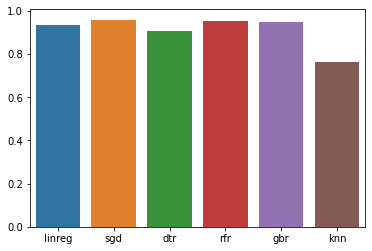

In [219]:
model = ['linreg','sgd','dtr','rfr','gbr','knn']
sns.barplot(x = model , y = R2_Score)

# Tunning the parameters

In [220]:
# SGD regressor Model

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
param_grid_1 = {'penalty': ['l2','l1','elasticnet'],'alpha':[0.001,0.1,0.2,0.5,0.9,1.0]}

In [223]:
GSCV_1 = GridSearchCV(SGDRegressor(),param_grid = param_grid_1,cv = 5)

In [224]:
GSCV_1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.1, 0.2, 0.5, 0.9, 1.0],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [225]:
GSCV_1.best_params_

{'alpha': 0.5, 'penalty': 'l2'}

In [226]:
GSCV_Score_1 = GSCV_1.best_score_
GSCV_Score_1

0.8517599743417424

In [227]:
# RandomForestRegressor Model

In [228]:
param_grid_2 = {'criterion':['squared_error','absolute_error'],'max_depth':[10,8,6,4],'min_samples_split':[2,3,5],'min_samples_leaf':[1,2,3]}

In [229]:
GSCV_2 = GridSearchCV(RandomForestRegressor(),param_grid = param_grid_2,cv = 5)

In [230]:
GSCV_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 8, 6, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5]})

In [231]:
GSCV_2.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [232]:
GSCV_Score_2 = GSCV_2.best_score_
GSCV_Score_2

0.8997291844526929

In [233]:
# GradientBoostingRegressor Model

In [234]:
param_grid_3 =  {'learning_rate':[0.2,0.3,0.5,0.1],'criterion':['squared_error','mse'],'alpha':[0.2,0.4,0.5]}

In [235]:
GSCV_3 = GridSearchCV(GradientBoostingRegressor(),param_grid = param_grid_3,cv = 5)

In [236]:
GSCV_3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.2, 0.4, 0.5],
                         'criterion': ['squared_error', 'mse'],
                         'learning_rate': [0.2, 0.3, 0.5, 0.1]})

In [237]:
GSCV_3.best_params_

{'alpha': 0.2, 'criterion': 'mse', 'learning_rate': 0.3}

In [238]:
GSCV_Score_3 = GSCV_3.best_score_
GSCV_Score_3 

0.898716321434313

Text(0, 0.5, 'GSCV_score')

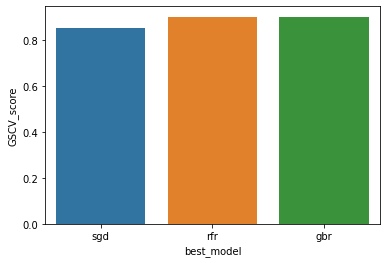

In [239]:
GSCV_Score = [GSCV_Score_1,GSCV_Score_2,GSCV_Score_3]
best_model = ['sgd','rfr','gbr']
sns.barplot(x = best_model , y = GSCV_Score)
plt.xlabel('best_model')
plt.ylabel('GSCV_score')

In [240]:
# From the above plot it is clear that Gradient Boosting Regressor model gives best score.
# So we consider Gradient Boosting Regressor as our 'Final Model'.

In [241]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
y_pred = gbr.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
MSE

4793929.234285439

In [242]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
y_pred = gbr.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MAE

1713.4688526736945

In [243]:
# R2-score

from sklearn.metrics import r2_score
y_pred = gbr.predict(X_test)
R2_score_final = r2_score(y_test,y_pred)
R2_score_final

0.9504562895987664

In [244]:
importances = gbr.feature_importances_
importances

array([3.66526211e-04, 2.46933599e-03, 1.62450792e-02, 2.39302230e-02,
       2.04231806e-02, 3.24519069e-03, 1.37962474e-01, 2.94969239e-02,
       5.42507735e-01, 5.16323147e-03, 9.10444811e-03, 1.77975163e-03,
       8.91139848e-02, 5.85323086e-03, 4.06871741e-03, 9.30177092e-02,
       5.74966983e-05, 1.99898674e-04, 4.91241585e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.38479620e-05, 0.00000000e+00,
       4.03878812e-04, 8.45965733e-06, 4.43085363e-05, 1.28480776e-04,
       9.58234507e-05, 0.00000000e+00, 5.14580755e-05, 9.22752626e-04,
       1.11505846e-04, 0.00000000e+00, 1.07357199e-04, 1.58900933e-07,
       2.14470466e-04, 3.59640044e-04, 0.00000000e+00, 1.64184300e-04,
       6.65295443e-04, 1.80650985e-03, 3.56663249e-06, 1.22428790e-04,
       6.14709156e-05, 2.55595640e-06, 0.00000000e+00, 9.68902469e-04,
       3.59816740e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.47445208e-04, 3.60871744e-04, 0.00000000e+00, 0.00000000e+00,
      

In [261]:
df = pd.DataFrame({'importances':[3.66526211e-04, 2.46933599e-03, 1.62450792e-02, 2.39302230e-02,2.04231806e-02, 3.24519069e-03, 1.37962474e-01, 2.94969239e-02,5.42507735e-01, 5.16323147e-03, 9.10444811e-03, 1.77975163e-03,8.91139848e-02, 5.85323086e-03, 4.06871741e-03, 9.30177092e-02,5.74966983e-05, 1.99898674e-04, 4.91241585e-03, 0.00000000e+00,0.00000000e+00, 0.00000000e+00, 5.38479620e-05, 0.00000000e+00,4.03878812e-04, 8.45965733e-06, 4.43085363e-05, 1.28480776e-04,9.58234507e-05, 0.00000000e+00, 5.14580755e-05, 9.22752626e-04,1.11505846e-04, 0.00000000e+00, 1.07357199e-04, 1.58900933e-07,2.14470466e-04, 3.59640044e-04, 0.00000000e+00, 1.64184300e-04,6.65295443e-04, 1.80650985e-03, 3.56663249e-06, 1.22428790e-04,6.14709156e-05, 2.55595640e-06, 0.00000000e+00, 9.68902469e-04,3.59816740e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,1.47445208e-04, 3.60871744e-04, 0.00000000e+00, 0.00000000e+00,0.00000000e+00, 3.96884483e-06, 0.00000000e+00, 8.74575141e-06,3.26076060e-03, 0.00000000e+00, 0.00000000e+00],'features':['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height','curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'make_alfa-romero', 'make_audi', 'make_bmw','make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu','make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury','make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth','make_porsche', 'make_saab', 'make_subaru', 'make_toyota','make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas','aspiration_std', 'aspiration_turbo', 'body-style_convertible','body-style_hardtop', 'body-style_hatchback', 'body-style_sedan','body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd','drive-wheels_rwd', 'engine-location_front', 'engine-location_rear', 'engine-type_dohc', 'engine-type_l', 'engine-type_ohc','engine-type_ohcf', 'engine-type_ohcv', 'fuel-system_1bbl','fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi','fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi']})

In [267]:
df

,importances,features
0,0.000367,symboling
1,0.002469,num-of-doors
2,0.016245,wheel-base
3,0.023930,length
4,0.020423,width
...,...,...
58,0.000000,fuel-system_idi
59,0.000009,fuel-system_mfi
60,0.003261,fuel-system_mpfi
61,0.000000,fuel-system_spdi
